In [1]:
import get_data
import numpy as np
import pandas as pd
import regression_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('./insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
inspector = get_data.get('./insurance.csv')
by_row,by_feature = inspector.detect_missing_values()

In [4]:
by_feature

,missing count
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [5]:
outliers = inspector.modified_zScore()
outliers

,age,bmi,children,charges
0,1.124167,0.403409,0.6745,1.008357
1,1.180375,0.543795,0.0000,1.028999
2,0.618292,0.419545,1.3490,0.662917
3,0.337250,1.241693,0.6745,1.693715
4,0.393458,0.245273,0.6745,0.741217
...,...,...,...,...
1333,0.618292,0.091977,1.3490,0.163763
1334,1.180375,0.245273,0.6745,0.964431
1335,1.180375,1.040795,0.6745,1.041863
1336,1.011750,0.742273,0.6745,0.991047


In [6]:
# age outliers
outliers[outliers['age']>=3]

,age,bmi,children,charges


In [7]:
# charges outliers
outliers[outliers['charges']>=3]

,age,bmi,children,charges
14,0.674500,1.892795,0.6745,4.062749
19,0.505875,0.790682,0.6745,3.689896
23,0.281042,0.245273,0.0000,3.806069
29,0.449667,0.952045,0.6745,3.941691
30,0.955542,0.839091,0.6745,3.521647
...,...,...,...,...
1301,1.292792,0.076648,1.3490,5.017820
1303,0.224833,0.419545,0.6745,3.823251
1308,0.786917,0.032273,0.6745,3.295200
1313,1.124167,0.693864,0.6745,3.630776


In [8]:
# data.drop(outliers[outliers['charges']>=3].index,axis=0,inplace=True)

In [9]:
# children outliers
outliers[outliers['children']>=3]

,age,bmi,children,charges


In [10]:
# bmi outliers
outliers[outliers['bmi']>=3]

,age,bmi,children,charges
116,1.067958,3.011045,0.6745,0.268697
847,0.899333,3.224045,0.0000,0.933242
1047,0.955542,3.579045,0.0000,4.719896
1317,1.180375,3.667795,0.6745,1.104542


In [11]:
# data.drop([116,847,1317],axis=0,inplace=True)
# data

In [12]:
target = data['charges']
data = data.drop(labels='charges',axis=1)

In [13]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [14]:
vfi = pd.DataFrame()
vfi['features'] = numeric_data.columns
vfi['VFI'] = [variance_inflation_factor(numeric_data.values,i) for i in range(numeric_data.shape[1])]
vfi.sort_values(by='VFI')

,features,VFI
2,children,1.796637
0,age,7.536550
1,bmi,7.846515


In [15]:
full = pd.get_dummies(data)
full.ndim

2

In [16]:
np.ones(full.shape[0]).reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [17]:
full = np.hstack([full,np.ones(full.shape[0]).reshape(-1,1)])
full.shape

(1338, 12)

In [18]:
train_x,test_x,train_y,test_y = train_test_split(full,target,test_size=0.2,random_state=42)
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((1070, 12), (1070,), (268, 12), (268,))

In [19]:
weights = regression_model.regression(train_x,train_y)

In [20]:
weights

array([   256.97570583,    337.09255195,    425.27878352,   -118.37875696,
         -136.9704486 , -11953.23903066,  11697.8898251 ,    395.74794285,
           25.07061663,   -262.11635371,   -414.05141133,   -255.34920556])

In [21]:
predict_1 = np.dot(test_x,weights)
predict_1

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

In [22]:
r2_score(test_y,predict_1)*100, mean_squared_error(test_y,predict_1)

(78.35929767120724, 33596915.851361446)

In [23]:
weights_gd,cost_history = regression_model.fit(np.sqrt(train_x),np.sqrt(train_y),0.0001,100001)
weights_gd

array([ 15.74637273,   6.41778226,   4.10270499,  -0.40252849,
        -1.52575064, -44.41927214,  42.49099301,   1.5814264 ,
        -0.71587189,  -0.41093805,  -2.38289559,  -1.92827912])

In [68]:
weights_ridge = regression_model.ridge_fit(np.sqrt(train_x),
                                           np.sqrt(train_y),
                                           0.001,
                                           0.05,
                                           100001)
weights_ridge

array([ 16.66971766,  11.69888978,   4.24049059,  -7.68195854,
        -9.37889163, -53.70190929,  36.64105912,  -1.27923235,
        -3.69807883,  -5.89271818,  -6.19082081, -17.06085017])

In [65]:
# optimize alpha
alpha = np.arange(0,1,0.01)
alpha_hist = []

for i in range(alpha.shape[0]):
    w = regression_model.ridge_fit(np.sqrt(train_x),
                                   np.sqrt(train_y),
                                   0.01,
                                   alpha[i],
                                   10001)
    alpha_hist.append(w)

alpha_hist

[array([ 16.67286663,  11.714077  ,   4.24128238,  -7.70373555,
         -9.40178087, -53.73050748,  36.62499107,  -1.28767504,
         -3.70752356,  -5.9078491 ,  -6.20246872, -17.10551641]),
 array([ 16.67224202,  11.71106975,   4.24112548,  -7.69942464,
         -9.39724788, -53.72483165,  36.62815913,  -1.286004  ,
         -3.70565409,  -5.90485212,  -6.20016231, -17.09667252]),
 array([ 16.67161786,  11.70806505,   4.24096869,  -7.69511749,
         -9.39271869, -53.71915962,  36.63132344,  -1.28433444,
         -3.70378626,  -5.90185762,  -6.19785785, -17.08783618]),
 array([ 16.67099414,  11.7050629 ,   4.24081203,  -7.69081409,
         -9.3881933 , -53.71349137,  36.63448399,  -1.28266635,
         -3.70192007,  -5.89886561,  -6.19555536, -17.07900739]),
 array([ 16.67037086,  11.70206331,   4.24065548,  -7.68651443,
         -9.38367171, -53.70782692,  36.63764078,  -1.28099974,
         -3.70005551,  -5.89587607,  -6.19325481, -17.07018613]),
 array([ 16.66974802,  11.6990

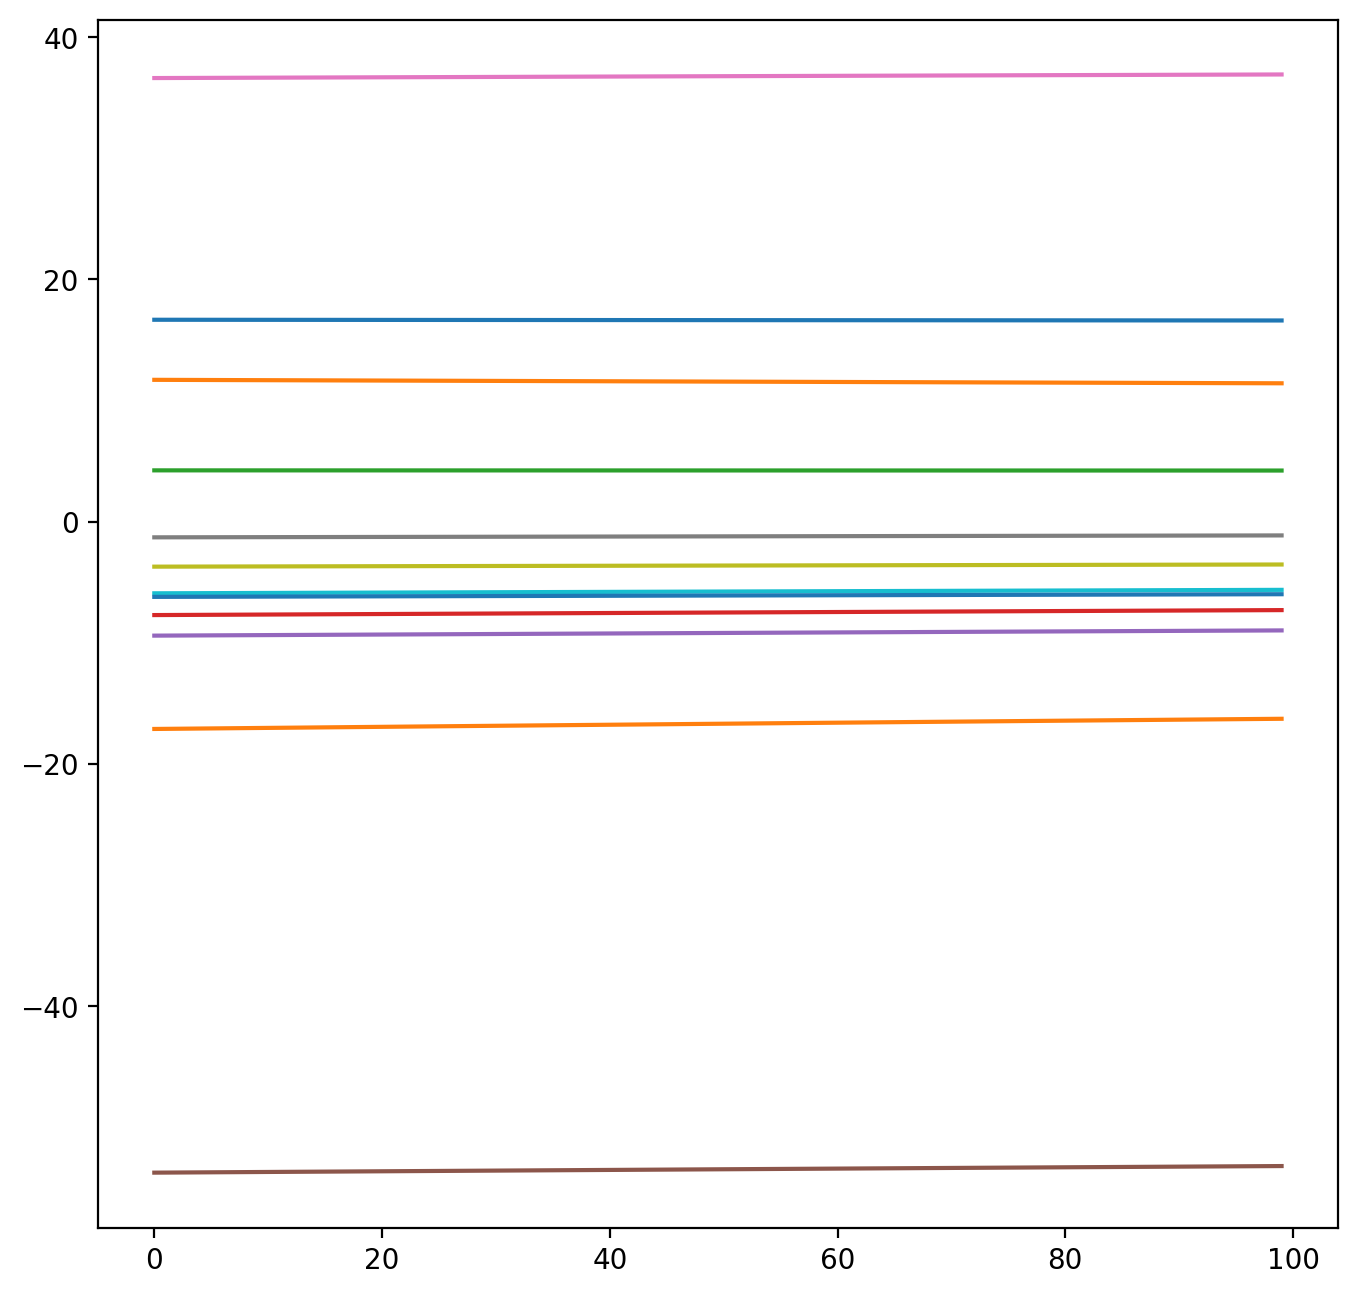

In [67]:
alpha_hist = np.asarray(alpha_hist)

fig = plt.figure(figsize=[8,8],dpi=200)
ax = fig.add_subplot(111)
ax.plot(alpha_hist,label=)
plt.show()

In [25]:
predict_2 = np.dot(np.sqrt(test_x),weights_gd)
predict_2

array([ 98.46435378,  82.17564113, 198.69197601,  97.87754175,
       143.2169887 ,  87.69809842,  51.62325573, 116.89419161,
        64.83925739, 103.11712607, 161.7081024 ,  93.53452409,
        76.64911135, 194.29413765, 201.65064989, 192.42801436,
       110.79302013, 190.64581079,  97.72880238, 175.97686532,
        69.02460745,  95.44500723,  53.76585939,  69.17894232,
       105.01621588, 107.23124811, 110.86021671,  76.84590408,
       101.68497288,  53.75552782,  93.40035812, 107.62160818,
        62.89546123,  74.55187313,  69.28921045,  99.82856483,
        60.10383691,  93.31860697, 188.62134728, 175.28340424,
        62.99943646,  65.30441605, 111.20437488, 104.74379379,
        86.34664252, 108.45182554,  67.71269848,  68.34145881,
       187.47863561,  84.95431745, 116.48874633,  57.4052572 ,
        97.52936035,  53.31729319, 107.20849759, 107.22069851,
        72.33734356, 170.73507036, 107.71099623, 106.4734083 ,
       112.04081314,  87.03041254, 118.3931365 ,  92.46

In [26]:
r2_score(np.sqrt(test_y),predict_2)*100, mean_squared_error(np.sqrt(test_y),predict_2)

(80.27921818605628, 478.5204025340267)

In [69]:
predict_3 = np.dot(np.sqrt(test_x),weights_ridge)
predict_3

array([ 96.79569695,  81.97432302, 202.21753065,  95.92415912,
       145.26099214,  91.73383588,  46.03001905, 121.54460891,
        57.12934547, 102.85585711, 160.44729816,  93.59998799,
        73.31032062, 200.84559202, 208.26800351, 197.59070697,
       114.77631398, 195.33271593,  94.92253365, 178.17043815,
        63.69123673,  95.77159656,  50.83236963,  72.27366004,
       105.11186936, 109.65132592, 113.7979074 ,  76.32356896,
       100.8920793 ,  48.91605146,  92.59946939, 109.70851989,
        61.13571678,  68.75933813,  66.98469263, 104.21268607,
        56.10517883,  92.88617395, 190.11533878, 177.97642663,
        60.07255614,  64.09200359, 114.34778183, 103.23294585,
        85.67201462, 107.30004518,  68.0878802 ,  63.72750712,
       191.12807841,  85.2615783 , 118.45955   ,  52.33081885,
       102.8183949 ,  49.0988306 , 107.35604712, 108.74134163,
        68.91306531, 175.26682845, 109.6240026 , 109.09251537,
       113.64802435,  89.78504682, 121.49769202,  90.36

In [70]:
r2_score(np.sqrt(test_y),predict_3)*100, mean_squared_error(np.sqrt(test_y),predict_3)

(80.93875722463133, 462.5168338518414)

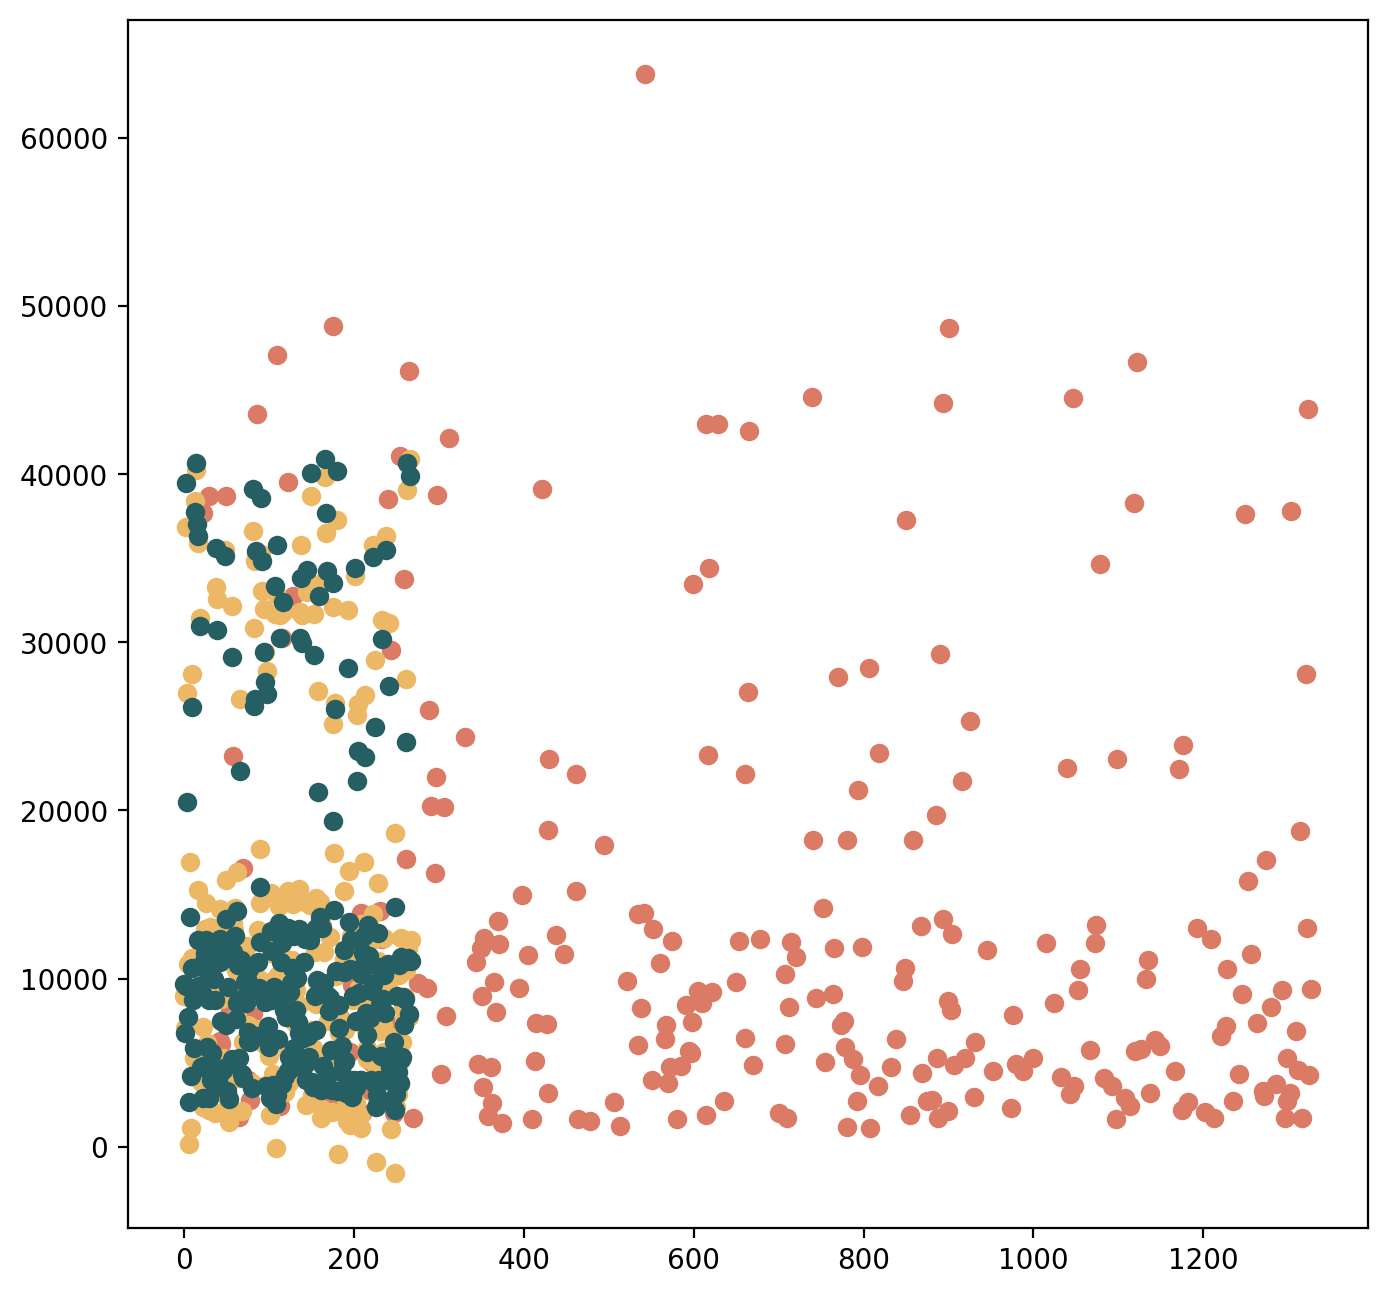

In [27]:
plt.figure(figsize=[8,8],dpi=200)
plt.plot(test_y,'o',color='#DB7B65')
plt.plot(predict_1,'o',color='#ECB865')
plt.plot(np.square(predict_2),'o',color='#255E63')
plt.show()

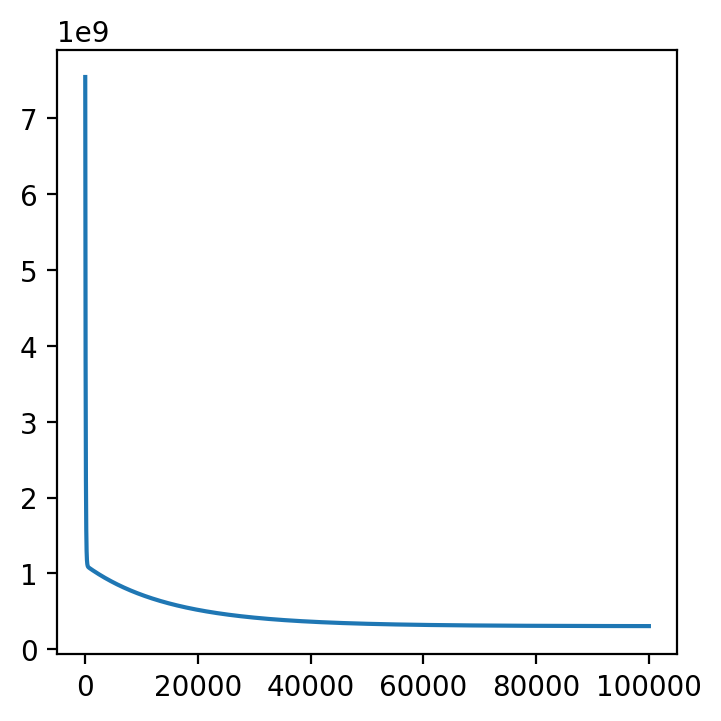

In [28]:
plt.figure(figsize=[4,4],dpi=200)
plt.plot(cost_history)
plt.show()
